In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/dsjob.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [3]:
df.isnull().mean()*100

,0
enrollee_id,0.000000
city,0.000000
city_development_index,0.000000
gender,23.860968
relevent_experience,0.000000
enrolled_university,1.456083
education_level,2.442461
major_discipline,14.654767
experience,0.234852
company_size,29.215594


In [4]:
cols = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]
cols

['enrolled_university', 'education_level', 'experience', 'last_new_job']

In [5]:
df[cols].sample(5)

,enrolled_university,education_level,experience,last_new_job
1706,no_enrollment,Masters,3,2
529,no_enrollment,Masters,3,1
60,no_enrollment,High School,7,1
351,no_enrollment,Phd,7,2
969,no_enrollment,Graduate,>20,2


In [6]:
df['education_level'].value_counts()

,count
education_level,
Graduate,1269
Masters,496
High School,222
Phd,54
Primary School,36


In [7]:
len(df[cols].dropna())/len(df)

0.9478628464067638

In [8]:
new_df = df[cols].dropna()
df.shape , new_df.shape

((2129, 13), (2018, 4))

In [9]:
import matplotlib.pyplot as plt

<Axes: >

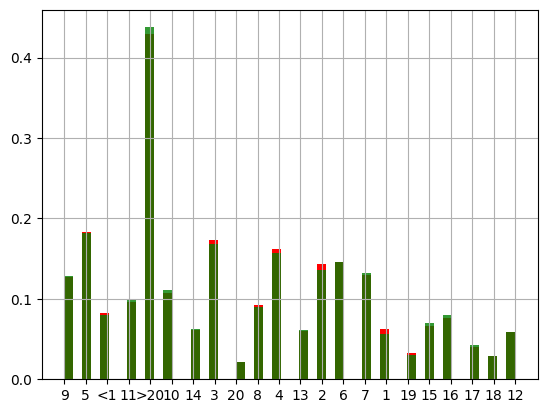

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].hist(bins=50, ax=ax, density=True , color = 'red')

# data often cca , the argument alpha makes the color transparent , so we can
# see the overlay of the 2 distribution

new_df['experience'].hist(bins=50, ax = ax , color='green' , density=True, alpha=0.8)


In [12]:
temp = pd.concat([
    # percentage of observations per category , original data
    df['enrolled_university'].value_counts() / len(df),

    # percentage of observations per category , cca data
    new_df['enrolled_university'].value_counts() / len(df)
],
                 axis=1)
# add columns name
temp.columns = ['original','cca']
temp

,original,cca
enrolled_university,,
no_enrollment,0.713481,0.689995
Full time course,0.204321,0.191639
Part time course,0.067637,0.066228


In [13]:
temp = pd.concat([
    # percentage of observations per category , original data
    df['education_level'].value_counts() / len(df),

    # percentage of observations per category , cca data
    new_df['education_level'].value_counts() / len(df)
],
                 axis=1)
# add columns name
temp.columns = ['original','cca']
temp

,original,cca
education_level,,
Graduate,0.596054,0.579615
Masters,0.232973,0.226867
High School,0.104274,0.100986
Phd,0.025364,0.024894
Primary School,0.016909,0.015500
